<a href="https://colab.research.google.com/github/fedhere/DSPS_FBianco/blob/main/Labs/DSPS_2025_titanictree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/fbb.mplstyle")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 1 reading data from kaggle

In [2]:
# pip install kaggle

In [3]:
# from google.colab import drive

# drive.mount("/content/gdrive")


In [4]:
# cd /content/gdrive/MyDrive/

# create a file kaggle.json by requesting and API key to kaggle (under account)
# https://www.kaggle.com/docs/api
# and upload it to your google drive (manuallym outside of the notebook). Upload it to the general drive foloder and make sure it is still called kaggle.json

Change the permission on the file so that it is secure and cannot be seen used others. The update the environmental variables KAGGLE_USERNAME and KAGGLE_KEY based on the values on the file


The competition is https://www.kaggle.com/competitions/titanic/code and you need to join the competition on the website to get the data

In [5]:
# ls kaggle/kaggle.json

In [6]:
# !chmod 600 kaggle/kaggle.json

In [7]:

# envs = json.load(open("kaggle/kaggle.json", "r"))
# os.environ["KAGGLE_USERNAME"] = envs['username']
# os.environ["KAGGLE_KEY"] = envs['key']

In [8]:
#check that it worked by listing the kaggle datasets
!kaggle datasets list

ref                                                           title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset  Global Earthquake-Tsunami Risk Assessment Dataset       16151  2025-10-01 16:35:53.273000          10127        369  1.0              
jockeroika/life-style-data                                    Life Style Data                                       3995645  2025-10-14 13:50:45.303000          11996        264  0.8235294        
jaderz/hospital-beds-management                               Hospital Beds Management                                47583  2025-10-03 09:21:58.590000           8441        210  1.0              
ahmadrazakashif

In [9]:
#make a directory dsps, go in that directory, create a subdirectory kaggleTitanic, download the data there, unzip it
!mkdir kaggleTitianic

mkdir: cannot create directory ‘kaggleTitianic’: File exists


In [10]:
#create a directory for these data


download the titanic data into the directory you created for it

In [11]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
!trash *.csv
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


read in the data

In [13]:
titanic = pd.read_csv("train.csv")

In [14]:
titanic.shape

(891, 12)

In [15]:
titanic.dropna(subset=["Survived", "Sex", "Pclass", "Age"], inplace=True)

In [16]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# 2 data cleaning and wrangling

### turn gender into numeric

In [17]:
titanic["gender"] = titanic['Sex'].map({'male':0, 'female':1})
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0




### throw away data that you will not use

In [18]:
titanic_short = titanic[["Pclass", "gender", "Age"]]

In [19]:
titanic_short.values

array([[ 3.,  0., 22.],
       [ 1.,  1., 38.],
       [ 3.,  1., 26.],
       ...,
       [ 1.,  1., 19.],
       [ 1.,  0., 26.],
       [ 3.,  0., 32.]], shape=(714, 3))

In [20]:
titanic[["Survived"]].values.shape, titanic_short.shape


((714, 1), (714, 3))

# 3 test the purity of various splits
## first split

### split by gender

In [21]:
print ("Survived fraction\n M     F \n {0:.2f} {1:.2f}".format
    (((titanic_short.gender.values == 0) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.gender.values == 0).sum(),
     ((titanic_short.gender.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.gender.values == 1).sum()))

Survived fraction
 M     F 
 0.21 0.75


In [22]:
print ("Died fraction\n M     F \n {0:.2f} {1:.2f}".format
    (((titanic_short.gender.values == 0) & (titanic.Survived.values == 0)).sum() * 1.0 /
       (titanic_short.gender.values == 0).sum(),
       ((titanic_short.gender.values == 1) & (titanic.Survived.values == 0)).sum() * 1.0 /
      (titanic_short.gender.values == 1).sum()))

Died fraction
 M     F 
 0.79 0.25


### split by age (at 6.5)

In [23]:
print ("Survived fraction\n >6.5  <6.5 \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Age.values >6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.Age.values >6.5).sum(),
      ((titanic_short.Age.values <=6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.Age.values <=6.5).sum()))

Survived fraction
 >6.5  <6.5 
 0.39  0.70


In [24]:
print ("Died fraction\n >6.5  <6.5 \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Age.values >6.5) & (titanic.Survived.values == 0)).sum() * 1.0 /
       (titanic_short.Age.values >6.5).sum(),
      ((titanic_short.Age.values <=6.5) & (titanic.Survived.values == 0)).sum() * 1.0 /
       (titanic_short.Age.values <=6.5).sum()))

Died fraction
 >6.5  <6.5 
 0.61  0.30


### split by travel class

In [25]:
print ("Survived fraction\n 1st   2nd \n {0:.2f}  {1:.2f}".format
     (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
      (titanic_short.Pclass.values == 1).sum(),
       ((titanic_short.Pclass.values == 2) & (titanic.Survived.values == 1)).sum() * 1.0 /
      (titanic_short.Pclass.values == 2).sum()))

Survived fraction
 1st   2nd 
 0.66  0.48


In [26]:
print ("Survived fraction\n 2nd   3rd \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Pclass.values == 2) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.Pclass.values == 2).sum(),
        ((titanic_short.Pclass.values == 3) & (titanic.Survived.values == 1)).sum() * 1.0 /
      (titanic_short.Pclass.values == 3).sum()))

Survived fraction
 2nd   3rd 
 0.48  0.24


In [27]:
print ("Survived fraction\n 1st   3rd \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.Pclass.values == 1).sum(),
        ((titanic_short.Pclass.values == 3) & (titanic.Survived.values == 1)).sum() * 1.0 /
      (titanic_short.Pclass.values == 3).sum()))

Survived fraction
 1st   3rd 
 0.66  0.24


In [28]:
print ("Survived fraction\n 1st   2nd or 3rd \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.Pclass.values == 1).sum(),
        (((titanic_short.Pclass.values == 3) | (titanic_short.Pclass.values == 2)) & (titanic.Survived.values == 1)).sum() * 1.0 /
      ((titanic_short.Pclass.values == 3) | (titanic_short.Pclass.values == 3)).sum()))

Survived fraction
 1st   2nd or 3rd 
 0.66  0.47


# The purest split is by gender, so that is chosen as the first node

# second split

### by travel class

In [29]:
print ("Survived fraction of females: \n 1st   2nd,3rd\n {0:.2f}  {1:.2f}".format
       (((titanic_short.gender.values == 1) &
        (titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 1) & (titanic_short.Pclass.values == 1)).sum(),
        ((titanic_short.gender.values == 1) &
        ~(titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 1) & ~(titanic_short.Pclass.values == 1)).sum()))

Survived fraction of females: 
 1st   2nd,3rd
 0.96  0.65


In [30]:
print ("Survived fraction of males: \n 1st   2nd,3rd\n {0:.2f}  {1:.2f}".format
        (((titanic_short.gender.values == 0) &
        (titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 0) & (titanic_short.Pclass.values == 1)).sum(),
        ((titanic_short.gender.values == 0) &
        (~(titanic_short.Pclass.values == 1)) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 0) & (~(titanic_short.Pclass.values == 1))).sum() ))

Survived fraction of males: 
 1st   2nd,3rd
 0.40  0.15


### by age

In [31]:
print ("Survived fraction of females: \n <6.5  >=6.5   \n {0:.2f} {1:.2f}".format
        (((titanic_short.gender.values == 1) &
        (titanic_short.Age.values < 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 1) & (titanic_short.Age.values < 6.5)).sum(),

       ((titanic_short.gender.values == 1) &
        (titanic_short.Age.values >= 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 1) & (titanic_short.Age.values >= 6.5)).sum()))

Survived fraction of females: 
 <6.5  >=6.5   
 0.74 0.76


In [32]:
print ("Survived fraction of males: \n <6.5 >=6.5   \n {0:.2f}  {1:.2f}".format
     (((titanic_short.gender.values == 0) &
        (titanic_short.Age.values < 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 0) & (titanic_short.Age.values < 6.5)).sum(),
     ((titanic_short.gender.values == 0) &
        (titanic_short.Age.values >= 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 0) & (titanic_short.Age.values >= 6.5)).sum()))

Survived fraction of males: 
 <6.5 >=6.5   
 0.67  0.18


## The purest split is
## - for females by travel class
## - for males by age

# 4 actually run a tree model

In [33]:
from sklearn import tree
clf =  tree.DecisionTreeClassifier(max_depth=3, criterion="gini",
                        random_state=222).fit(titanic_short.values,
                                              titanic["Survived"])
clf.score(titanic_short.values, titanic["Survived"])

0.8081232492997199

In [34]:
#run it again
clf =  tree.DecisionTreeClassifier(max_depth=3, criterion="gini",
                        random_state=222).fit(titanic_short.values,
                                              titanic["Survived"])
clf.score(titanic_short.values, titanic["Survived"])

0.8081232492997199

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic_short, titanic["Survived"],
                                                    train_size=0.75, shuffle=True, random_state=302)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((535, 3), (535,), (179, 3), (179,))

In [36]:

clf =  tree.DecisionTreeClassifier(max_depth=3, criterion="gini",
                        random_state=222).fit(X_train,
                                              y_train)
print(f"training accuracy {clf.score(X_train,  y_train):.2f}, testing accuracy {clf.score(X_test,  y_test):.2f}")

training accuracy 0.83, testing accuracy 0.75


In [37]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=True,
                          title='',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data

    pl.imshow(cm, cmap="bone")
    pl.title(title)
    pl.colorbar()
    pl.axis('off')

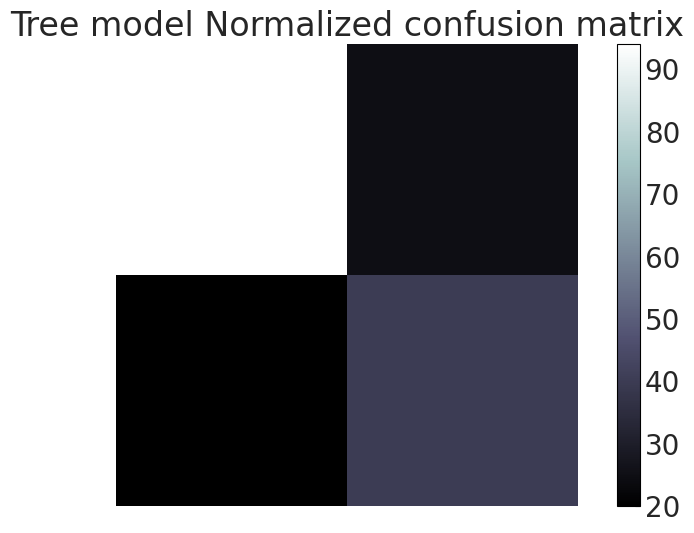

In [38]:

plot_confusion_matrix(clf.predict(X_test),
                      y_test,
                      title="Tree model")

# 5 create the dendrogram viz

In [39]:
import graphviz
dot_data = tree.export_graphviz(clf, feature_names=titanic_short.columns,
                                out_file=None)
graph = graphviz.Source(dot_data)

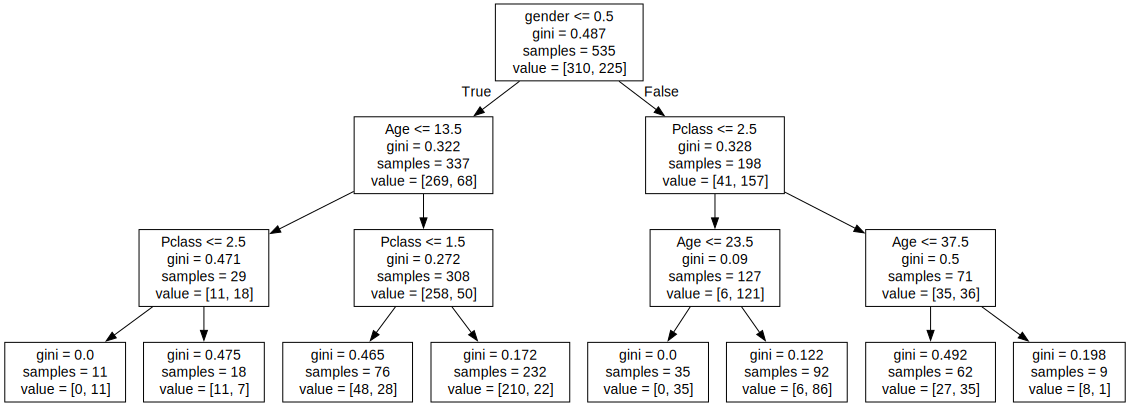

In [40]:
graph

In [41]:
graph.render("TitanicTree")

'TitanicTree.pdf'

# 6 run ensamble method:
## changing model to Random Forest

In [42]:
from sklearn import ensemble
rf =  ensemble.RandomForestClassifier(max_depth=3, criterion="gini",
                                       random_state=222).fit(titanic_short.values,
                                                             titanic["Survived"])
print ("score %.2f"%rf.score(titanic_short.values, titanic["Survived"]))

score 0.82


changing max depth

In [43]:
rf =  ensemble.RandomForestClassifier(max_depth=4, criterion="gini", n_estimators=100,
                                       random_state=222).fit(titanic_short.values,
                                                             titanic["Survived"])
print ("score %.2f"%rf.score(titanic_short.values, titanic["Survived"]))

score 0.82


In [44]:
rf =  ensemble.RandomForestClassifier(criterion="gini", max_depth=None, n_estimators=100,
                                       random_state=222).fit(titanic_short.values,
                                                             titanic["Survived"])
print ("score %.2f"%rf.score(titanic_short.values, titanic["Survived"]))

score 0.90


## changing model to Gradient Boosted Trees

In [45]:
gbt =  ensemble.GradientBoostingClassifier(max_depth=4,
                                           random_state=222).fit(titanic_short.values,
                                                                 titanic["Survived"])
print ("score %.2f"%gbt.score(titanic_short.values, titanic["Survived"]))

score 0.89


# 7 feature importance

In [46]:
print("Random Forest feature importance")
for f,fi in zip (titanic_short.columns, rf.feature_importances_):
  print (f, fi.round(2))

Random Forest feature importance
Pclass 0.19
gender 0.35
Age 0.46


In [47]:
print("Gradient Boosted Tree feature importance")
for f,fi in zip (titanic_short.columns, gbt.feature_importances_):
  print (f, fi.round(2))

Gradient Boosted Tree feature importance
Pclass 0.23
gender 0.47
Age 0.3


/usr/lib64/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


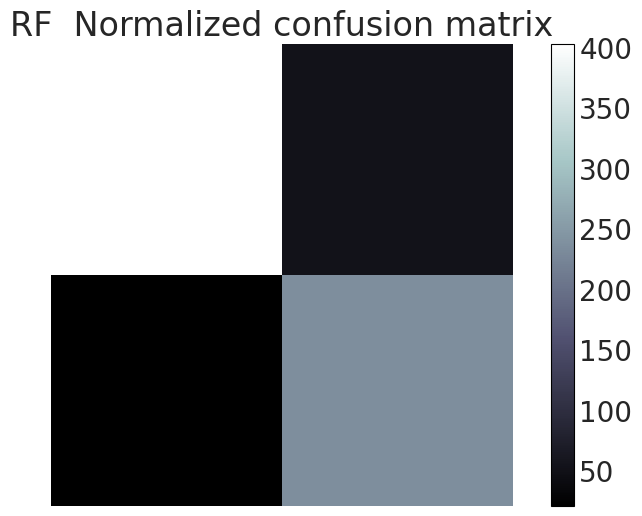

In [48]:
plot_confusion_matrix(rf.predict(titanic_short),
                      titanic["Survived"],
                      title="RF ")

/usr/lib64/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


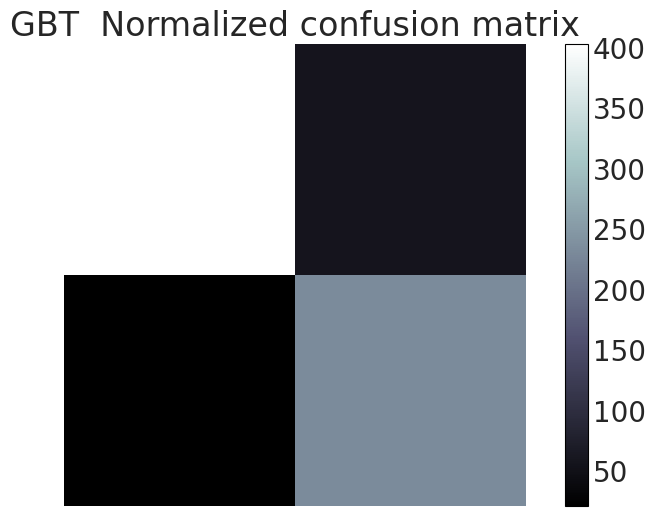

In [49]:
plot_confusion_matrix(gbt.predict(titanic_short),
                      titanic["Survived"], title="GBT ")

## calculate feasture importance uncertainties for RF method

In [50]:
fistd = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
print("Random Forest feature importance")
for f, fi, s in zip (titanic_short.columns, rf.feature_importances_, fistd):
  print (f, fi.round(2), "+/-", s.round(2))

Random Forest feature importance
Pclass 0.19 +/- 0.04
gender 0.35 +/- 0.05
Age 0.46 +/- 0.05


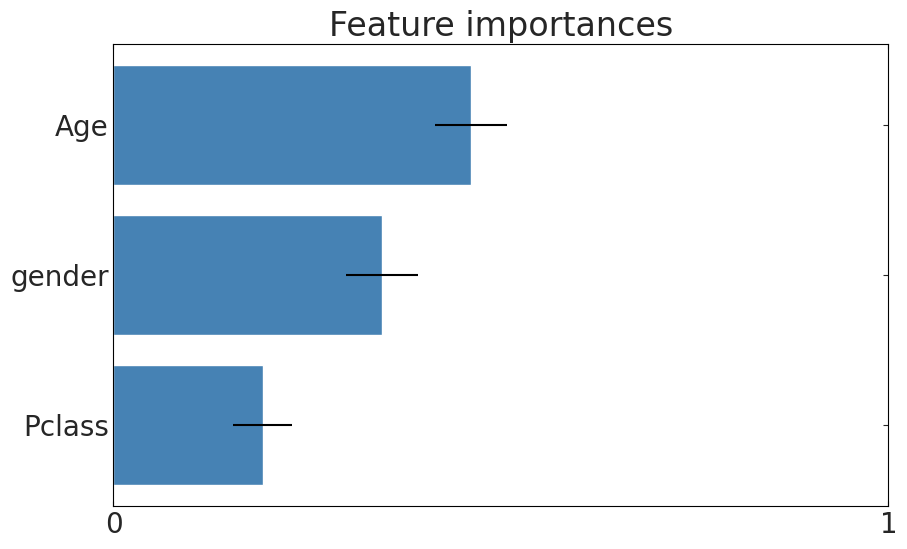

In [51]:
indices = np.argsort(rf.feature_importances_)
pl.figure()
pl.title("Feature importances")
pl.barh(np.arange(rf.feature_importances_.shape[0]),
        rf.feature_importances_[indices],
       xerr=fistd[indices], align="center")
pl.xticks(range(rf.feature_importances_.shape[0]), indices)
pl.yticks(range(rf.feature_importances_.shape[0]),
          labels=titanic_short.columns[indices])
pl.xlim(0, 1)
pl.show()


## Is the feature importance consistent between the 2 methods?